In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
import tensorflow as tf
from Battleship import *

# Training a Model

In [2]:
model = Battleship_Model()

In [3]:
optimizer = tf.keras.optimizers.Adam()

In [4]:
batch_size = 50
reps = 10_000

## Making a test set

To see how the model is performing, we'll evaluate it on the same set of partially revealed boards. Here, we'll create these boards.

In [5]:
test_losses = []

test_data, test_labels = [], []
for idx in range(0, 75):
    test_datum, test_label = give_data(num_boards=2, num_revealed=idx)

    test_data.append(test_datum[0])
    test_labels.append(test_label[0])

    test_data.append(test_datum[1])
    test_labels.append(test_label[1])

test_data, test_labels = np.array(test_data), np.array(test_labels)

## Now let's train

My thinking here is that this the model should basically be an autoencoder when every square is revealed. 
Besides that, it should also be really good at early games, since getting a good foothold on the locations of ships early-on should help it finish the game more quickly. 

So first, we'll train on boards starting with every square revealed, increasing the number of hidden squares until all 100 are hidden. 

Next, we'll train on boards with 0 to 50 revealed squares, and finally we'll do 0 to 25 revealed squares. 

In [6]:
for idx in range(reps):

    num_revealed = 100 - int(round(100 * idx / reps))

    data, labels = give_data(num_boards=batch_size, num_revealed=num_revealed)

    with tf.GradientTape() as tape:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=labels, logits=model.call(data)
        )

    model_gradients = tape.gradient(loss, model.trainable_weights)

    optimizer.apply_gradients(zip(model_gradients, model.trainable_weights))

    if idx % 500 == 0:

        test_predictions = model(test_data)

        test_loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=test_labels, logits=test_predictions
        )

        test_losses.append(np.mean(test_loss))

        print("current index: ", idx)
        print("current test loss: ", test_losses[-1])
        print("current num_revealed: ", num_revealed)
        print(" ")

for idx in range(reps):
    """
    Early game is probably mode important
    """
    num_revealed = idx % 50

    data, labels = give_data(num_boards=batch_size, num_revealed=num_revealed)

    with tf.GradientTape() as tape:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=labels, logits=model.call(data)
        )

    model_gradients = tape.gradient(loss, model.trainable_weights)

    optimizer.apply_gradients(zip(model_gradients, model.trainable_weights))

    if idx % 500 == 0:

        test_predictions = model(test_data)

        test_loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=test_labels, logits=test_predictions
        )

        test_losses.append(np.mean(test_loss))

        print("current index: ", idx)
        print("current test loss: ", test_losses[-1])
        print("current num_revealed: ", num_revealed)
        print(" ")

for idx in range(reps):
    """
    Again, early game is probably mode important
    """
    num_revealed = idx % 25

    data, labels = give_data(num_boards=batch_size, num_revealed=num_revealed)

    with tf.GradientTape() as tape:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=labels, logits=model.call(data)
        )

    model_gradients = tape.gradient(loss, model.trainable_weights)

    optimizer.apply_gradients(zip(model_gradients, model.trainable_weights))

    if idx % 500 == 0:

        test_predictions = model(test_data)

        test_loss = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=test_labels, logits=test_predictions
        )

        test_losses.append(np.mean(test_loss))

        print("current index: ", idx)
        print("current test loss: ", test_losses[-1])
        print("current num_revealed: ", num_revealed)
        print(" ")

current index:  0
current test loss:  0.66575015
current num_revealed:  100
 
current index:  500
current test loss:  0.6902392
current num_revealed:  95
 
current index:  1000
current test loss:  0.83401924
current num_revealed:  90
 
current index:  1500
current test loss:  0.8170847
current num_revealed:  85
 
current index:  2000
current test loss:  0.7681651
current num_revealed:  80
 
current index:  2500
current test loss:  0.64110357
current num_revealed:  75
 
current index:  3000
current test loss:  0.5515518
current num_revealed:  70
 
current index:  3500
current test loss:  0.44678324
current num_revealed:  65
 
current index:  4000
current test loss:  0.37793016
current num_revealed:  60
 
current index:  4500
current test loss:  0.33081058
current num_revealed:  55
 
current index:  5000
current test loss:  0.28204113
current num_revealed:  50
 
current index:  5500
current test loss:  0.2610125
current num_revealed:  45
 
current index:  6000
current test loss:  0.24420

In [7]:
model.save_weights("final_trained_battleship_model_weights")

## Plotting the losses over time

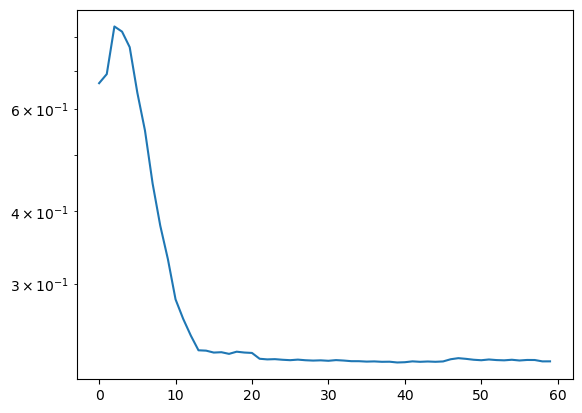

In [8]:
plt.plot([np.mean(x) for x in test_losses])
plt.yscale("log")